In [373]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Kraus
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile
from numpy import pi

Classical [4,2,2] code

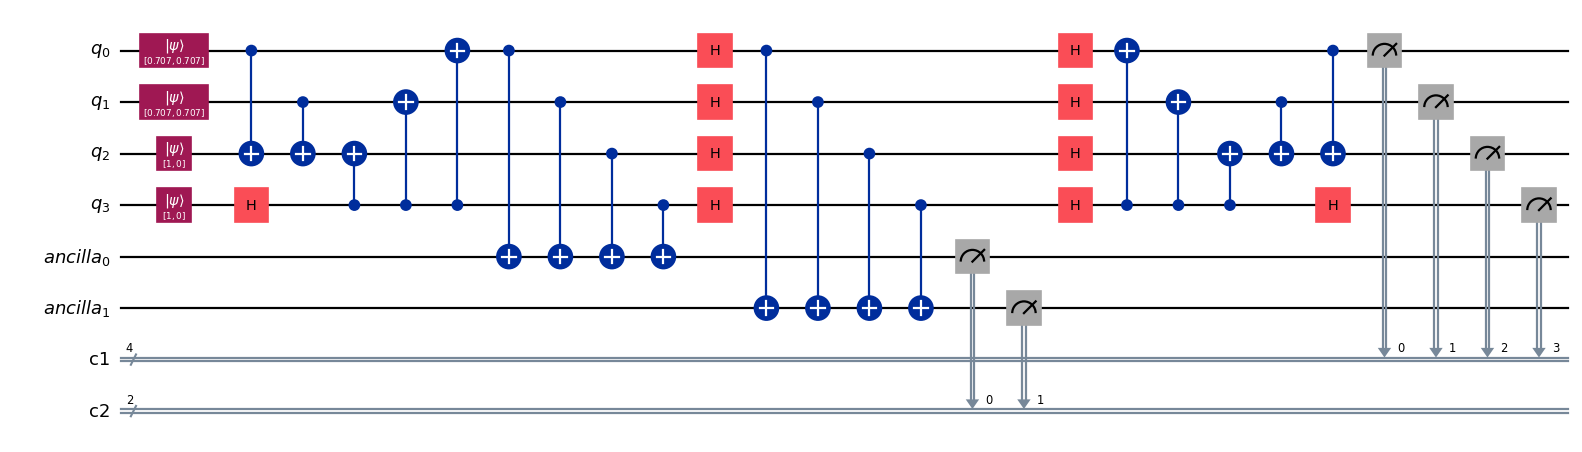

In [374]:
qreg = QuantumRegister(4, 'q')
ancilla = QuantumRegister(2, 'ancilla')
creg1 = ClassicalRegister(4, 'c1')
creg2 = ClassicalRegister(2, 'c2')

qcirc = QuantumCircuit(qreg, ancilla, creg1, creg2)
qcirc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0) #prepare state in superposition
qcirc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 1)
qcirc.initialize([1, 0], 2)
qcirc.initialize([1, 0], 3)

##### encoder
qcirc.h(qreg[3])
qcirc.cx(qreg[0],qreg[2])
qcirc.cx(qreg[1],qreg[2])
qcirc.cx(qreg[3],qreg[2])
qcirc.cx(qreg[3],qreg[1])
qcirc.cx(qreg[3],qreg[0])
#####

#error
qcirc.barrier()
#qcirc.z(0)
#qcirc.x(1)
qcirc.barrier()

for i in range(4):
    qcirc.cx(qreg[i],ancilla[0])

qcirc.barrier()

qcirc.h(qreg)

qcirc.barrier()

for i in range(4):
    qcirc.cx(qreg[i],ancilla[1])

qcirc.barrier()
qcirc.measure(ancilla, creg2)
qcirc.barrier()
qcirc.h(qreg)
qcirc.barrier()

##### decoder 
qcirc.cx(qreg[3],qreg[0])
qcirc.cx(qreg[3],qreg[1])
qcirc.cx(qreg[3],qreg[2])
qcirc.cx(qreg[1],qreg[2])
qcirc.barrier()
qcirc.cx(qreg[0],qreg[2])
qcirc.h(qreg[3])
qcirc.barrier()
#####

qcirc.measure(qreg, creg1)

qcirc.draw("mpl", scale=0.8, fold=-1, plot_barriers=False)

In [375]:
simulator = AerSimulator(method="automatic")
tqc = transpile(qcirc, simulator)
result = simulator.run(tqc, shots=10).result()

{'000010': 2, '000001': 2, '000011': 3, '000000': 3}


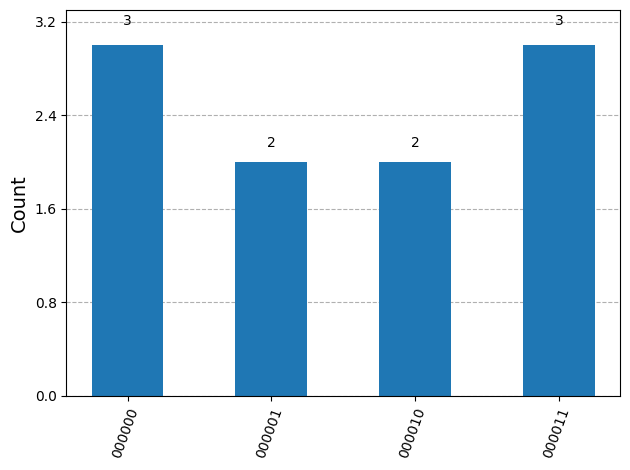

In [376]:
from qiskit.result import marginal_counts
counts = result.get_counts(tqc)

data_counts = marginal_counts(counts)#, indices=range(0,9))

print(data_counts)
plot_histogram(data_counts)

Transpiled code [4,2,2] for gates $R_{x}, R_{y}$, CZ

Наша задача в том, чтобы реализовать гейт CNOT через гейты $CZ, R_{x}, R_{y}$

Реализация $H = R_{y}(\frac{\pi}{2})R_{x}(\pi)$ или $H = R_{x}(\pi)R_{y}(\frac{\pi}{2})$ с точностью до глобальной фазы

По определению $CNOT = (I \otimes H)CZ(I \otimes H)$


Тогда $CNOT = (I \otimes R_{y}(\frac{\pi}{2})R_{x}(\pi))CZ(I \otimes R_{y}(\frac{\pi}{2})R_{x}(\pi)) = (I \otimes R_{y}(\frac{\pi}{2})R_{x}(\pi))CZ(I \otimes R_{x}(\pi)R_{y}(\frac{\pi}{2}))$ 

С точностью до глобальной фазы примем $CNOT = (I \otimes R_{y}(\frac{\pi}{2}))CZ(I \otimes R_{y}(-\frac{\pi}{2}))$ 

Также берется во внимание соотношение для гейтов $R_{y}(\frac{\pi}{2})R_{x}(\pi)R_{y}(\frac{\pi}{2}) = R_{x}(\pi)$

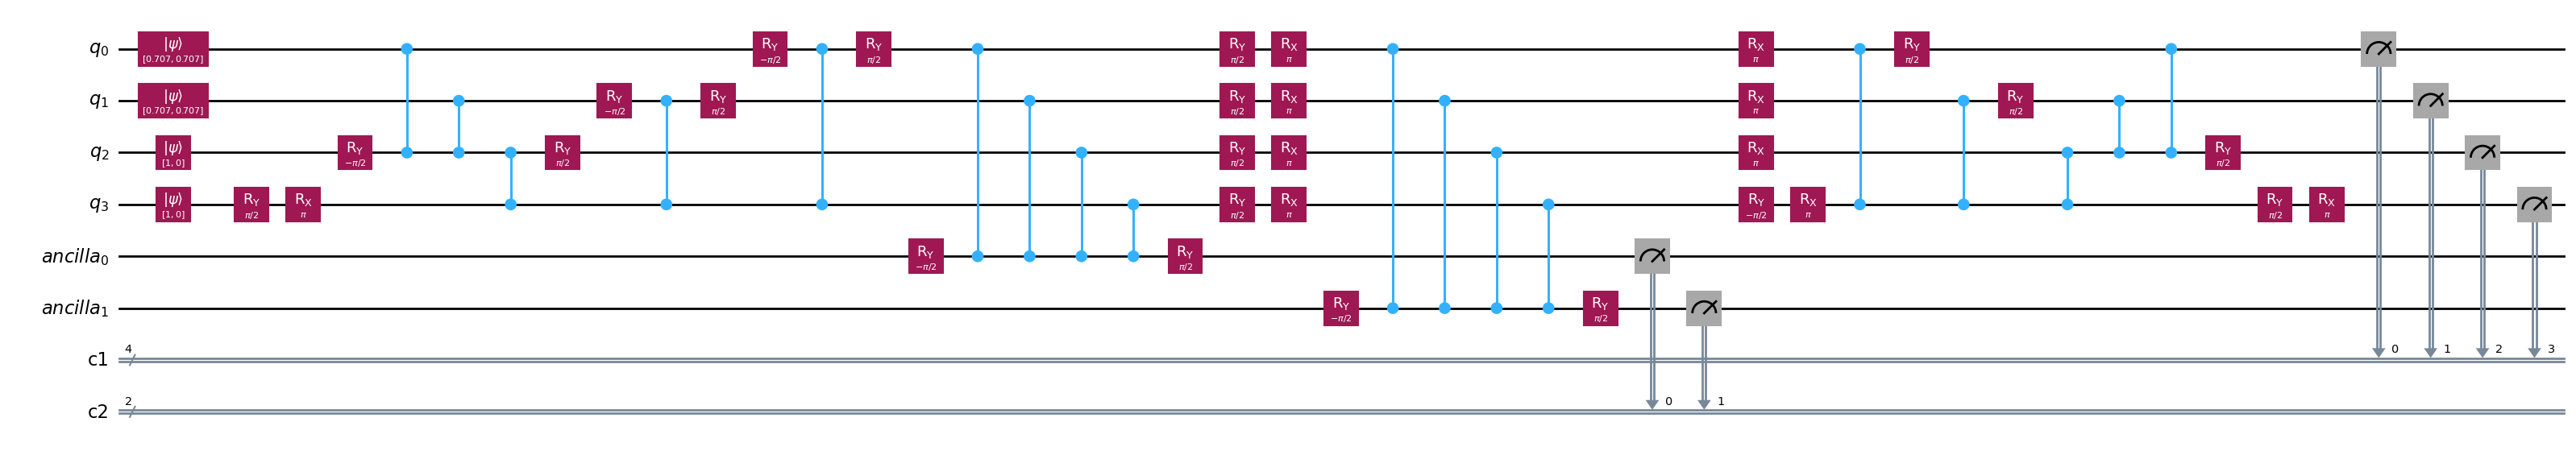

In [404]:
qreg = QuantumRegister(4, 'q')
ancilla = QuantumRegister(2, 'ancilla')
creg1 = ClassicalRegister(4, 'c1')
creg2 = ClassicalRegister(2, 'c2')

qcirc = QuantumCircuit(qreg, ancilla, creg1, creg2)
qcirc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0) #prepare state in superposition
qcirc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 1)
qcirc.initialize([1, 0], 2)
qcirc.initialize([1, 0], 3)

##### encoder
qcirc.ry(pi/2,qreg[3])
qcirc.rx(pi,qreg[3])
qcirc.barrier() 

qcirc.ry(-pi/2, qreg[2])
qcirc.cz(qreg[0], qreg[2])
qcirc.cz(qreg[1],qreg[2])
qcirc.cz(qreg[3],qreg[2])
qcirc.barrier()
qcirc.ry(pi/2, qreg[2])
qcirc.barrier()
qcirc.ry(-pi/2, qreg[1])
qcirc.barrier()
qcirc.cz(qreg[3],qreg[1])
qcirc.ry(pi/2, qreg[1])
qcirc.barrier()
qcirc.ry(-pi/2, qreg[0])
qcirc.cz(qreg[3],qreg[0])
qcirc.ry(pi/2, qreg[0])
#####

##### error
qcirc.barrier()
#qcirc.z(0)
#qcirc.x(0)
qcirc.barrier()

qcirc.ry(-pi/2, ancilla[0])
for i in range(4):
    qcirc.cz(qreg[i],ancilla[0])
qcirc.ry(pi/2, ancilla[0])

qcirc.barrier()

qcirc.ry(pi/2,qreg)
qcirc.rx(pi,qreg)

qcirc.barrier()


qcirc.ry(-pi/2, ancilla[1])
for i in range(4):
    qcirc.cz(qreg[i],ancilla[1])
qcirc.ry(pi/2, ancilla[1])

qcirc.barrier()
qcirc.measure(ancilla, creg2)
qcirc.barrier()
qcirc.ry(-pi/2,qreg[3]) 
qcirc.rx(pi,qreg)
qcirc.barrier()

##### decoder 
qcirc.cz(qreg[3],qreg[0])
qcirc.barrier()
qcirc.ry(pi/2, qreg[0])
qcirc.barrier()
qcirc.cz(qreg[3],qreg[1])
qcirc.barrier()
qcirc.ry(pi/2, qreg[1])
qcirc.barrier()
qcirc.cz(qreg[3],qreg[2])
qcirc.barrier()
qcirc.cz(qreg[1],qreg[2])
qcirc.barrier()
qcirc.cz(qreg[0],qreg[2])
qcirc.ry(pi/2, qreg[2])
qcirc.barrier()

qcirc.ry(pi/2,qreg[3])
qcirc.rx(pi,qreg[3])
qcirc.barrier()
#####
qcirc.measure(qreg, creg1)


qcirc.draw("mpl", scale=1, fold=-1, plot_barriers=False)

In [405]:
simulator = AerSimulator(method="automatic")
tqc = transpile(qcirc, simulator)
result = simulator.run(tqc, shots=100).result()

{'000001': 26, '000010': 24, '000000': 30, '000011': 20}


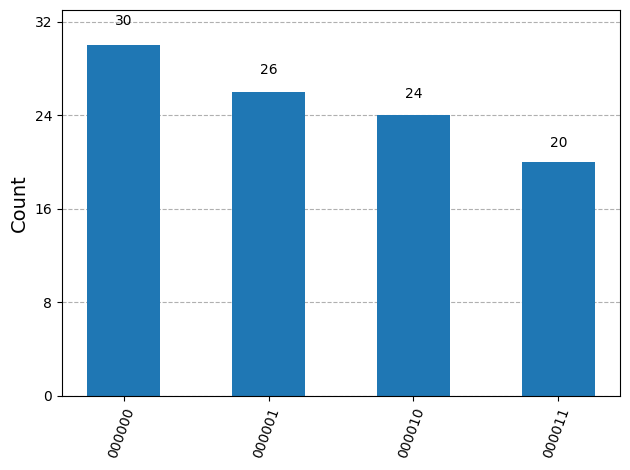

In [406]:
from qiskit.result import marginal_counts
counts = result.get_counts(tqc)

data_counts = marginal_counts(counts)

print(data_counts)
plot_histogram(data_counts)

In [413]:
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, QuantumError

In [414]:
def random_angle_rotation_error(ax,sigma=0.05):
    if ax == 'rx':
        delta = np.random.normal(0, sigma)      
        qc_err = QuantumCircuit(1)
        qc_err.rx(delta, 0)                     
        rx_error = QuantumError([(qc_err, 1.0)])  
        return rx_error
    else:
        delta = np.random.normal(0, sigma)      
        qc_err = QuantumCircuit(1)
        qc_err.ry(delta, 0)
        ry_error = QuantumError([(qc_err, 1.0)])
        return ry_error

In [415]:
def rotation_gate_error(ax,sigma1=0.05, sigma2=0.05): #sigma1 and sigma2 are parameters for normal distibutions of random angle rotations
    delta1 = np.random.normal(0, sigma1) * pi
    delta2 = np.random.normal(0, sigma2) * pi
    if ax == 'rx':
        qc_err = QuantumCircuit(1)
        qc_err.ry(delta2, 0)
        qc_err.rx(delta1, 0)                     
        rx_error = QuantumError([(qc_err, 1.0)])  
        return rx_error
    else:      
        qc_err = QuantumCircuit(1)
        qc_err.ry(delta1, 0)
        qc_err.rx(delta2, 0)      
        ry_error = QuantumError([(qc_err, 1.0)])
        return ry_error

In [416]:
rx_error = rotation_gate_error('rx', 0.05, 0.01)
ry_error = rotation_gate_error('ry', 0.05, 0.01)
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(rx_error, ['rx'])
noise_model.add_all_qubit_quantum_error(ry_error, ['ry'])

In [417]:
simulator = AerSimulator(method="automatic", noise_model=noise_model)
tqc = transpile(qcirc, simulator)
result = simulator.run(tqc, shots=1000).result()

{'101011': 2, '000010': 203, '101010': 2, '000001': 213, '000011': 208, '101100': 9, '000000': 231, '010110': 15, '001111': 45, '101101': 8, '010111': 8, '101000': 5, '101111': 8, '010101': 4, '101001': 2, '001010': 6, '000101': 1, '101110': 9, '001000': 6, '100011': 1, '001100': 1, '111001': 2, '010100': 3, '100010': 1, '001011': 4, '001001': 1, '001110': 1, '111100': 1}


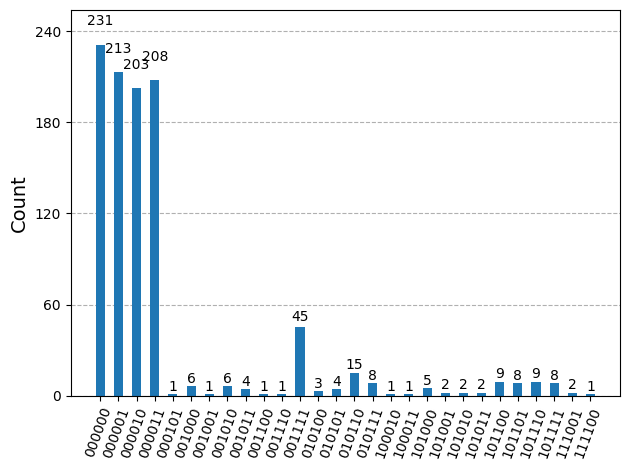

In [418]:
from qiskit.result import marginal_counts
counts = result.get_counts(tqc)

data_counts = marginal_counts(counts)

print(data_counts)
plot_histogram(data_counts)